In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_drive_risk_analysis.csv')
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [5]:
df.shape

(15, 2)

In [9]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

# Visualization

In [13]:
x = df[['speed']]
y = df['risk']

In [14]:
x

,speed
0,200
1,90
2,300
3,110
4,240
5,115
6,50
7,230
8,190
9,260


In [15]:
y

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

Text(0, 0.5, 'Accident Risk')

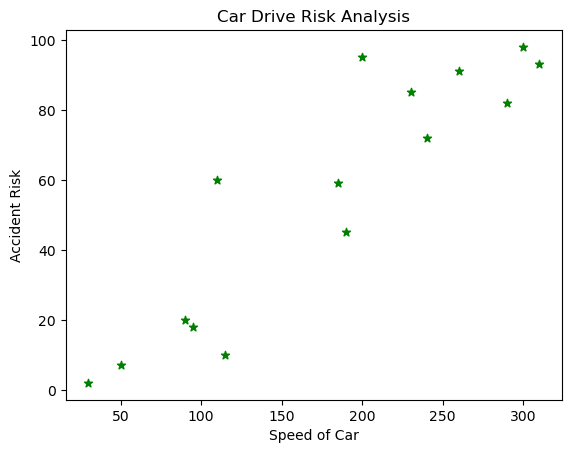

In [16]:
plt.scatter(df['speed'],df['risk'], marker="*", color="green")
plt.title('Car Drive Risk Analysis')
plt.xlabel('Speed of Car')
plt.ylabel('Accident Risk')

# Data Training And Data Testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=1)

In [19]:
xtrain

,speed
1,90
13,95
0,200
14,30
9,260
8,190
12,310
11,185
5,115


In [20]:
ytrain

1     20
13    18
0     95
14     2
9     91
8     45
12    93
11    59
5     10
Name: risk, dtype: int64

In [21]:
xtest

,speed
3,110
7,230
6,50
2,300
10,290
4,240


In [22]:
ytest

3     60
7     85
6      7
2     98
10    82
4     72
Name: risk, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
regobj = LinearRegression()


In [24]:
regobj.fit(xtrain,ytrain)

LinearRegression()

In [25]:
regobj.predict(xtest)

array([ 27.15301215,  73.82259334,   3.81822156, 101.04651569,
        97.15738393,  77.7117251 ])

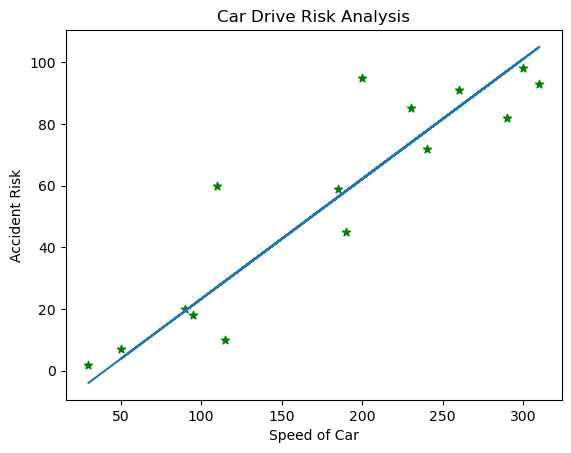

In [26]:
plt.scatter(df['speed'],df['risk'], marker="*", color="green")
plt.title('Car Drive Risk Analysis')
plt.xlabel('Speed of Car')
plt.ylabel('Accident Risk')
#best fit line draw for the overall data
plt.plot(df.speed, regobj.predict(df[['speed']]))

In [29]:
regobj.predict([[280]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93.26825216])

# SO, here for speed 280, the risk is approximate 93%

In [30]:
#Testing by Formula y=mx+c
regobj.coef_

array([0.38891318])

In [31]:
regobj.intercept_

-15.627437265017058

In [32]:
y = 0.38891318*280 + (-15.627437265017058)
y

93.26825313498296